# US Accidents Exploratory Data Analysis

To Do: 
1) Talk about EDA
2) Talk about the dataset(source, the compontents of the dataset and uses of each component)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# adjustig pandas column display options
pd.set_option('display.max_columns',None)

In [3]:
df= pd.read_csv(r'C:\Users\98686\Downloads\US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


Information about columns in data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
print(df.count(numeric_only=True))
print("Total Numerical Columns:", len(df.count(numeric_only=True)))

Severity             7728394
Start_Lat            7728394
Start_Lng            7728394
End_Lat              4325632
End_Lng              4325632
Distance(mi)         7728394
Temperature(F)       7564541
Wind_Chill(F)        5729375
Humidity(%)          7554250
Pressure(in)         7587715
Visibility(mi)       7551296
Wind_Speed(mph)      7157161
Precipitation(in)    5524808
Amenity              7728394
Bump                 7728394
Crossing             7728394
Give_Way             7728394
Junction             7728394
No_Exit              7728394
Railway              7728394
Roundabout           7728394
Station              7728394
Stop                 7728394
Traffic_Calming      7728394
Traffic_Signal       7728394
Turning_Loop         7728394
dtype: int64
Total Numerical Columns: 26


column wise count of missing values

In [6]:
# to see columns wise count of missing values
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

Percentage of Missing Values per column

In [7]:
missing_percentages= df.isna().sum().sort_values(ascending=False)/len(df)*100
missing_percentages

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [8]:
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


<Axes: >

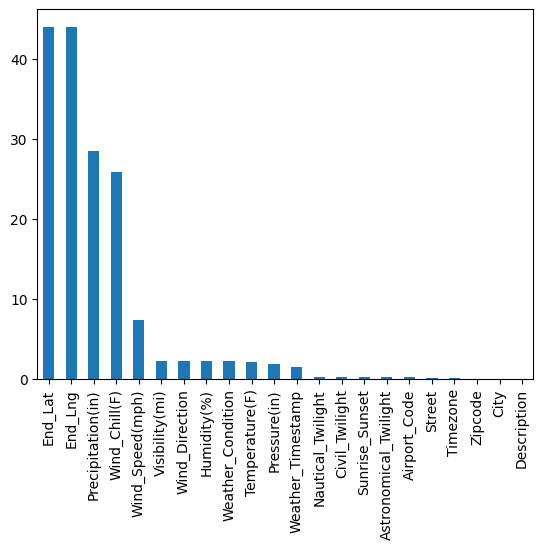

In [9]:
missing_percentages[missing_percentages !=0].plot(kind='bar')

### Drop columns 'End-Lat','End-Long' and 'ID'
(as both have high null values and not needed for analysis)

In [10]:
new_df= df.drop(['ID','End_Lat','End_Lng'], axis=1)

Percent of missing values in each column of new_df

In [11]:
cols= new_df.isnull().sum().sort_values(ascending=False)
null_cols= cols[cols!=0]
null_percent= (null_cols/len(new_df))*100
null_percent

Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

List of columns with null values

In [12]:
null_cols= [i for i in new_df.columns if df[i].isnull().any()]
null_cols

['Description',
 'Street',
 'City',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

##### Remove columns with least percent of missing values
(as won't affect the results of 7+ million records, due to less share of null values in total records of new_df)

In [13]:
new_df_2= new_df.dropna(subset=['Description',
 'Street',
 'City',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight'] )

In [14]:
new_df_2.isnull().sum().sort_values(ascending=False)
# as we can see, all such insignificant column's null records have been removed

Precipitation(in)        2039318
Wind_Chill(F)            1769890
Wind_Speed(mph)           375173
Wind_Direction                 0
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Source                         0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Sunset                 0
Civil_Twilight                 0
Nautical_Twilight              0
Railway                        0
Visibility(mi)                 0
Severity                       0
Pressure(in)                   0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Descriptio

## Exploratory Analysis and Visualization

In [15]:
new_df_2.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Time Analysis

In [16]:
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7426729 entries, 0 to 7728393
Data columns (total 43 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   Distance(mi)           float64
 7   Description            object 
 8   Street                 object 
 9   City                   object 
 10  County                 object 
 11  State                  object 
 12  Zipcode                object 
 13  Country                object 
 14  Timezone               object 
 15  Airport_Code           object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Wind_Chill(F)          float64
 19  Humidity(%)            float64
 20  Pressure(in)           float64
 21  Visibility(mi)         float64
 22  Wind_Direction         

We need to work with 'Start_Time' column but it's dtype is string, thus, we need to first convert dtype to datetime. Then, extract and create columns of Year,Month, Hour, Weekday

Unable to convert Start_Time's dtype to datetime as the format isn't correct for some columns
(Example: For Start_Time column, Some records have '2016-02-08 05:46:00.00000' instead of '2016-02-08 05:46:00' format )
So, we first need to ensure proper format

In [17]:
new_df_2['Start_Time']= new_df_2['Start_Time'].str.split('.').str[0]
new_df_2['End_Time']= new_df_2['End_Time'].str.split('.').str[0]

C:\Users\98686\AppData\Local\Temp\ipykernel_22960\1966271870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['Start_Time']= new_df_2['Start_Time'].str.split('.').str[0]
C:\Users\98686\AppData\Local\Temp\ipykernel_22960\1966271870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['End_Time']= new_df_2['End_Time'].str.split('.').str[0]


Convert dtype to datetime

In [18]:
new_df_2['Start_Time']= pd.to_datetime(new_df_2['Start_Time'])
new_df_2['End_Time']= pd.to_datetime(new_df_2['End_Time'])

C:\Users\98686\AppData\Local\Temp\ipykernel_22960\3318947935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['Start_Time']= pd.to_datetime(new_df_2['Start_Time'])
C:\Users\98686\AppData\Local\Temp\ipykernel_22960\3318947935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['End_Time']= pd.to_datetime(new_df_2['End_Time'])


Now, we can create columns of Year,Month,Hour,Weekday from the Start_Time column

In [19]:
new_df_2['Year'] = new_df_2['Start_Time'].dt.year
new_df_2['Month'] = new_df_2['Start_Time'].dt.month
new_df_2['Hour'] = new_df_2['Start_Time'].dt.hour
new_df_2['Weekday'] = new_df_2['Start_Time'].dt.weekday

C:\Users\98686\AppData\Local\Temp\ipykernel_22960\1459850676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['Year'] = new_df_2['Start_Time'].dt.year
C:\Users\98686\AppData\Local\Temp\ipykernel_22960\1459850676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['Month'] = new_df_2['Start_Time'].dt.month
C:\Users\98686\AppData\Local\Temp\ipykernel_22960\1459850676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

### Yearly

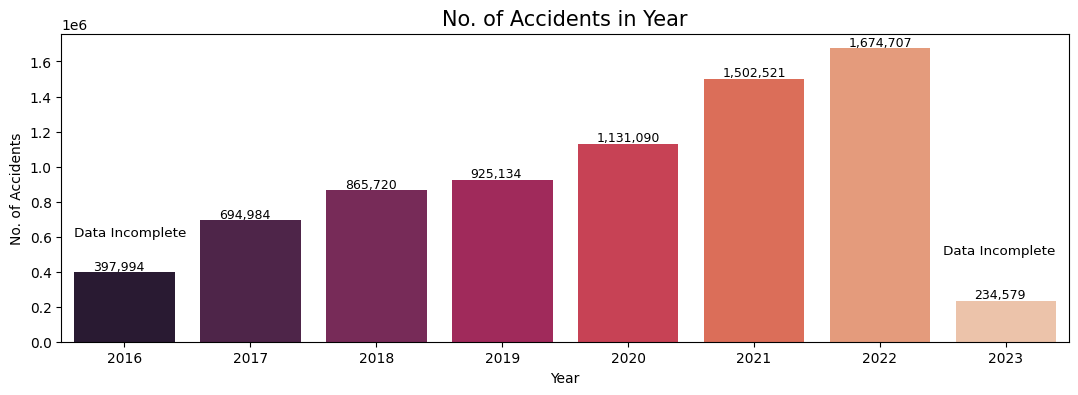

In [20]:
fig, ax= plt.subplots(figsize=(13,4))
c= sns.countplot(new_df_2, x='Year', palette='rocket')
c.set_ylabel('No. of Accidents')
c.set_title('No. of Accidents in Year', fontsize=15)
plt.annotate("Data Incomplete", xy=(6.5,500000), fontsize=9.7)
plt.annotate("Data Incomplete", xy=(-0.40,600000), fontsize=9.7)

for i in ax.patches:
    count= '{:,.0f}'.format(i.get_height())
    x = i.get_x()+0.15
    y=i.get_height()+12000
    ax.annotate(count, (x,y), fontsize=9);

In [21]:
df_2016= new_df_2[new_df_2['Year']==2016]
df_2017= new_df_2[new_df_2['Year']==2017]
df_2018= new_df_2[new_df_2['Year']==2018]
df_2019= new_df_2[new_df_2['Year']==2019]
df_2020= new_df_2[new_df_2['Year']==2020]
df_2021= new_df_2[new_df_2['Year']==2021]
df_2022= new_df_2[new_df_2['Year']==2022]
df_2023= new_df_2[new_df_2['Year']==2023]
df_2017_2022= new_df_2[(new_df_2['Year']>=2017) & (new_df_2['Year']<=2022)]

## Monthly

### 2023 Monthly Accidents

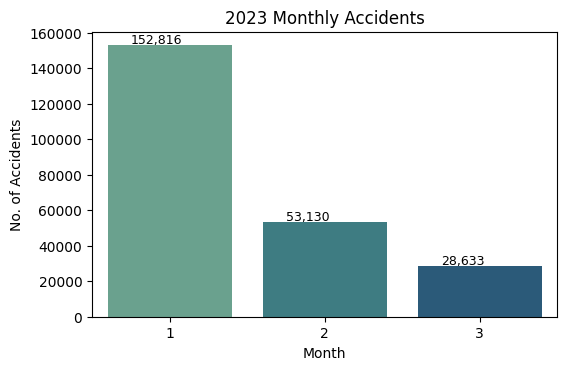

In [22]:
fig, ax= plt.subplots(figsize=(6,3.7))
m6 = sns.countplot(df_2023, x='Month', palette='crest')
m6.set_title('2023 Monthly Accidents')
m6.set_ylabel('No. of Accidents')

for i in ax.patches:
    count= '{:,.0f}'.format(i.get_height())
    x = i.get_x()+0.15
    y=i.get_height()+1000
    ax.annotate(count, (x,y), fontsize=9);

### Accident Analysis from 2017 to 2022

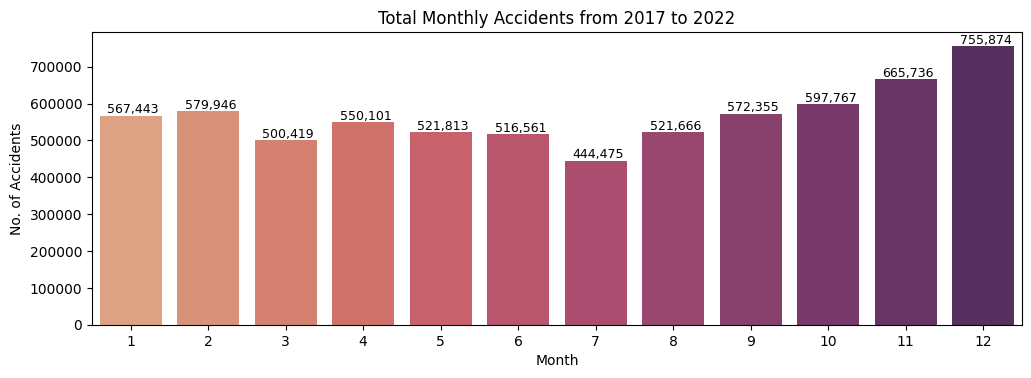

In [23]:
fig, ax= plt.subplots(figsize=(12,3.8))
m6 = sns.countplot(df_2017_2022, x='Month', palette='flare')
m6.set_title('Total Monthly Accidents from 2017 to 2022')
m6.set_ylabel('No. of Accidents')

for i in ax.patches:
    count= '{:,.0f}'.format(i.get_height())
    x = i.get_x()+0.10
    y=i.get_height()+7000
    ax.annotate(count, (x,y), fontsize=9);

## Weekly

### All weeks of year 2023

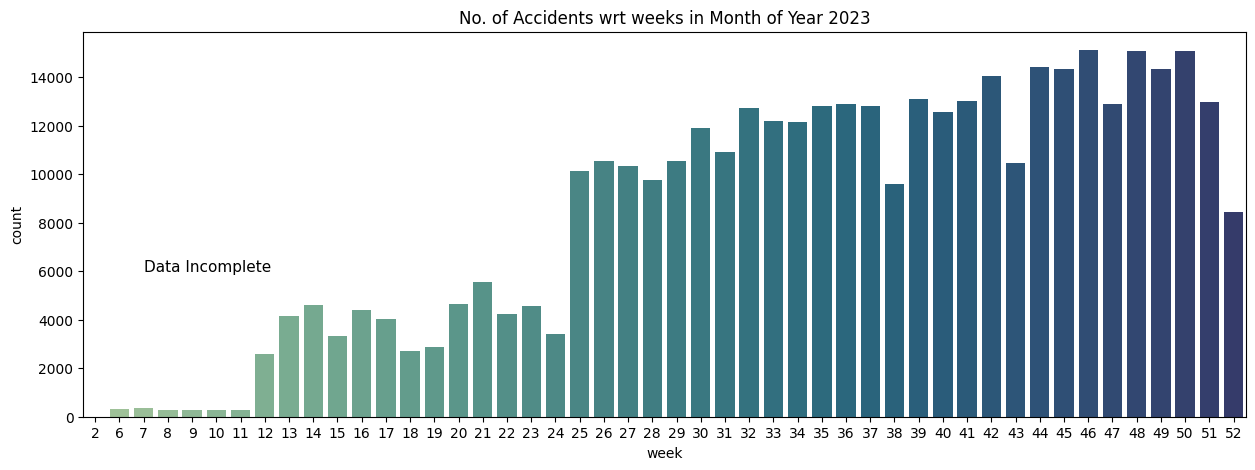

In [24]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=df_2016.Start_Time.dt.isocalendar().week, data=df_2016, orient = 'v', palette = "crest")
plt.annotate('Data Incomplete',xy=(2,6000), fontsize=11)
c.set_title("No. of Accidents wrt weeks in Month of Year 2023");

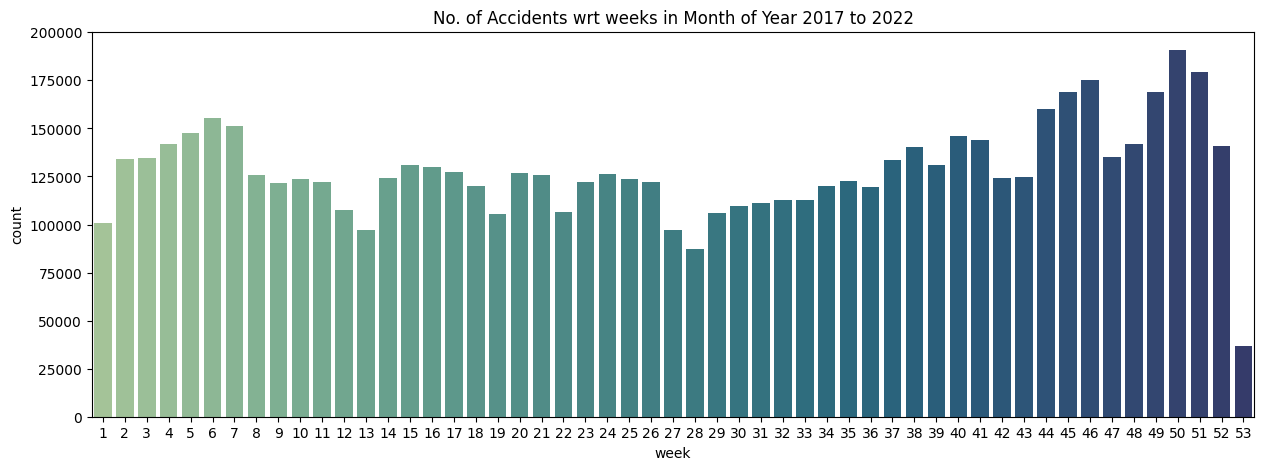

In [25]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=df_2017_2022.Start_Time.dt.isocalendar().week, data=df_2017_2022, orient = 'v', palette = "crest")
c.set_title("No. of Accidents wrt weeks in Month of Year 2017 to 2022");

## Weekdays

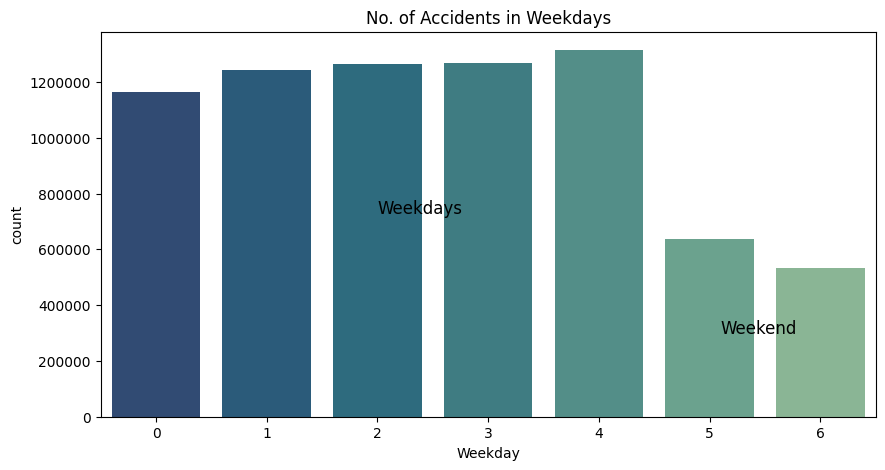

In [26]:
fig, ax = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
c = sns.countplot(x="Weekday", data=new_df_2, orient = 'v', palette = "crest_r")
plt.annotate('Weekdays',xy=(2,728000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,300000), fontsize=12)
c.set_title("No. of Accidents in Weekdays");

## Hour

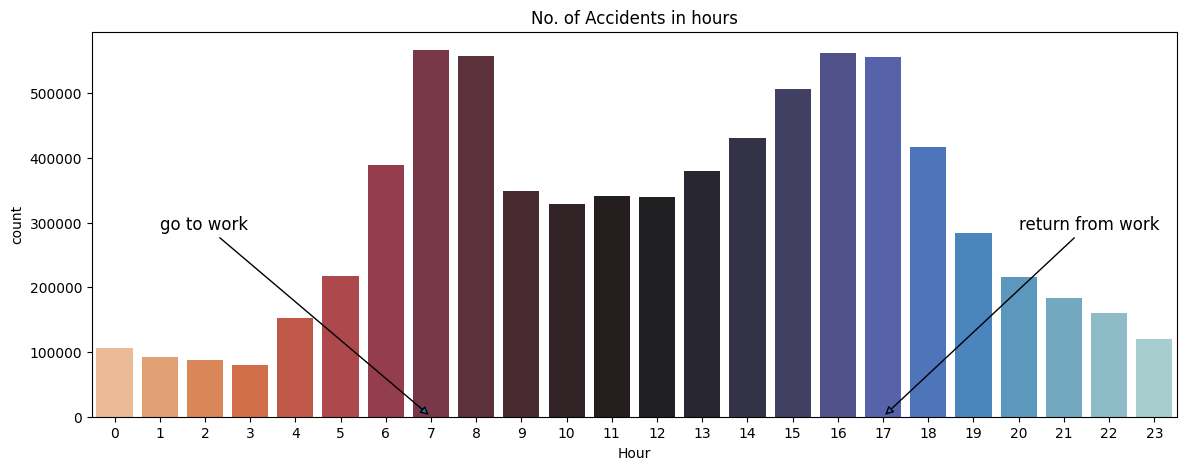

In [27]:
fig, ax = plt.subplots(figsize = (14,5))
c = sns.countplot(x="Hour", data=new_df_2, orient = 'v', palette = "icefire_r")
plt.annotate('go to work',xy=(7,0),xytext=(1,290000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('return from work',xy=(17,0),xytext=(20,290000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in hours");

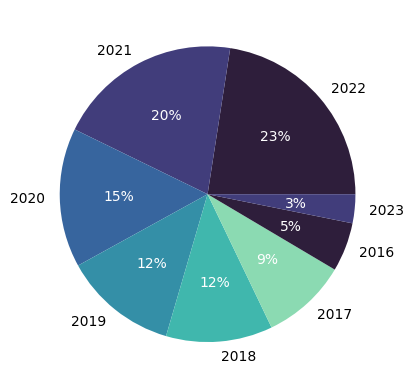

In [28]:
fig, ax= plt.subplots()
plt.gca().set_facecolor('black')
year_labels= new_df_2['Year'].value_counts().index
year_values= new_df_2['Year'].value_counts().values
palette_color= sns.color_palette('mako')
ys= plt.pie(x=year_values, labels=year_labels, colors=palette_color, autopct='%.0f%%' )

for text in ys[2]:
    text.set_color('white');

## Severity

Common degree of severity

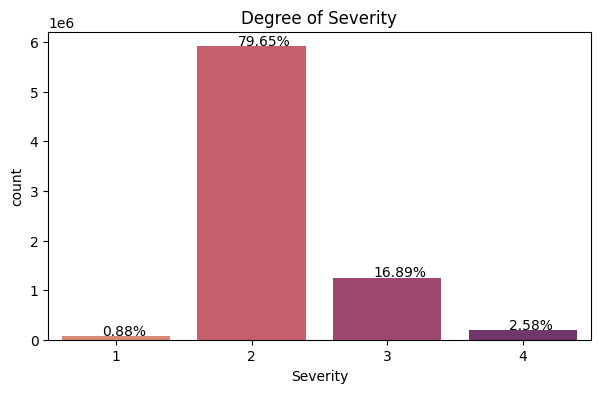

In [29]:
fig, ax = plt.subplots(figsize = (7,4))
c = sns.countplot(x="Severity", data=new_df_2, orient = 'v', palette = "flare")
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(new_df_2.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y));

States wrt severity

In [30]:
state_severity= new_df_2.groupby('State').sum('Severity')['Severity']
state_severity= state_severity.reset_index().sort_values(by='Severity', ascending=False)
top_40_sevr= state_severity[:40]

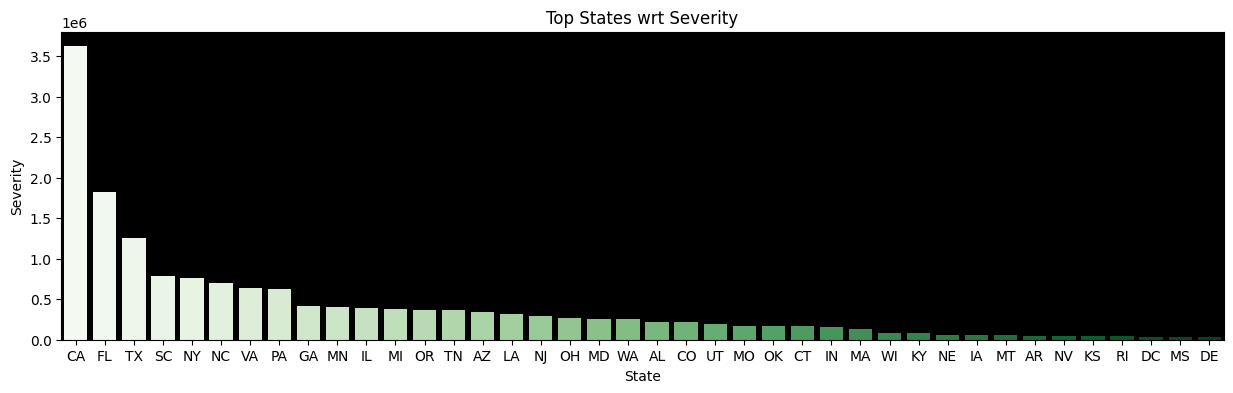

In [31]:
plt.subplots(figsize=(15,4))
ss= sns.barplot(data=top_40_sevr,x='State',y='Severity', palette='Greens')
ss.set_title('Top States wrt Severity')
ss.set_ylabel('Severity')
ss.set_facecolor('black');

Cities wrt Severity

In [32]:
top_30_cit_sevr= new_df_2.groupby('City').sum('Severity')['Severity'][:30]
top_30_cit_sevr= top_30_cit_sevr.reset_index().sort_values(by='Severity', ascending=False)

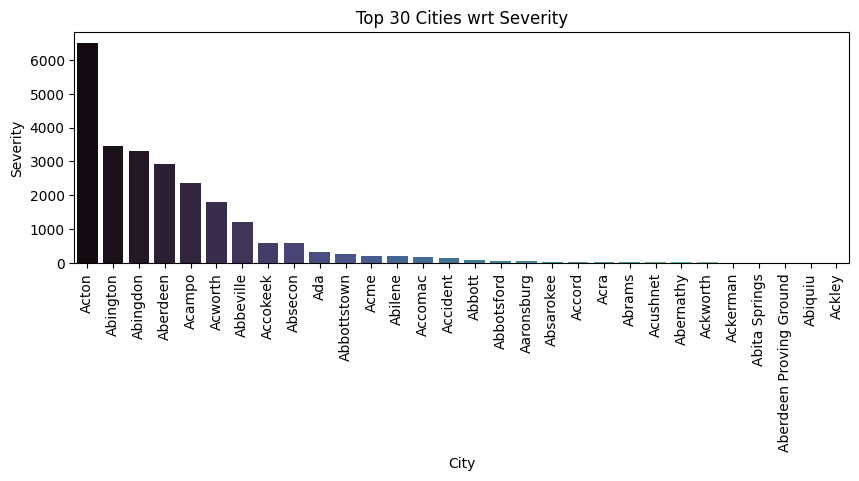

In [33]:
fig,ax = plt.subplots(figsize=(10,3))
cs= sns.barplot(data=top_30_cit_sevr,x='City',y='Severity', palette='mako')
cs.set_title('Top 30 Cities wrt Severity')
cs.set_ylabel('Severity')
cs.set_xticklabels(labels= cs.get_xticklabels(), rotation=90);

## Location

### State

In [34]:
print("Unique State:",new_df_2['State'].unique())
print("No. of Unique State:",len(new_df_2['State'].unique()))

Unique State: ['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']
No. of Unique State: 49


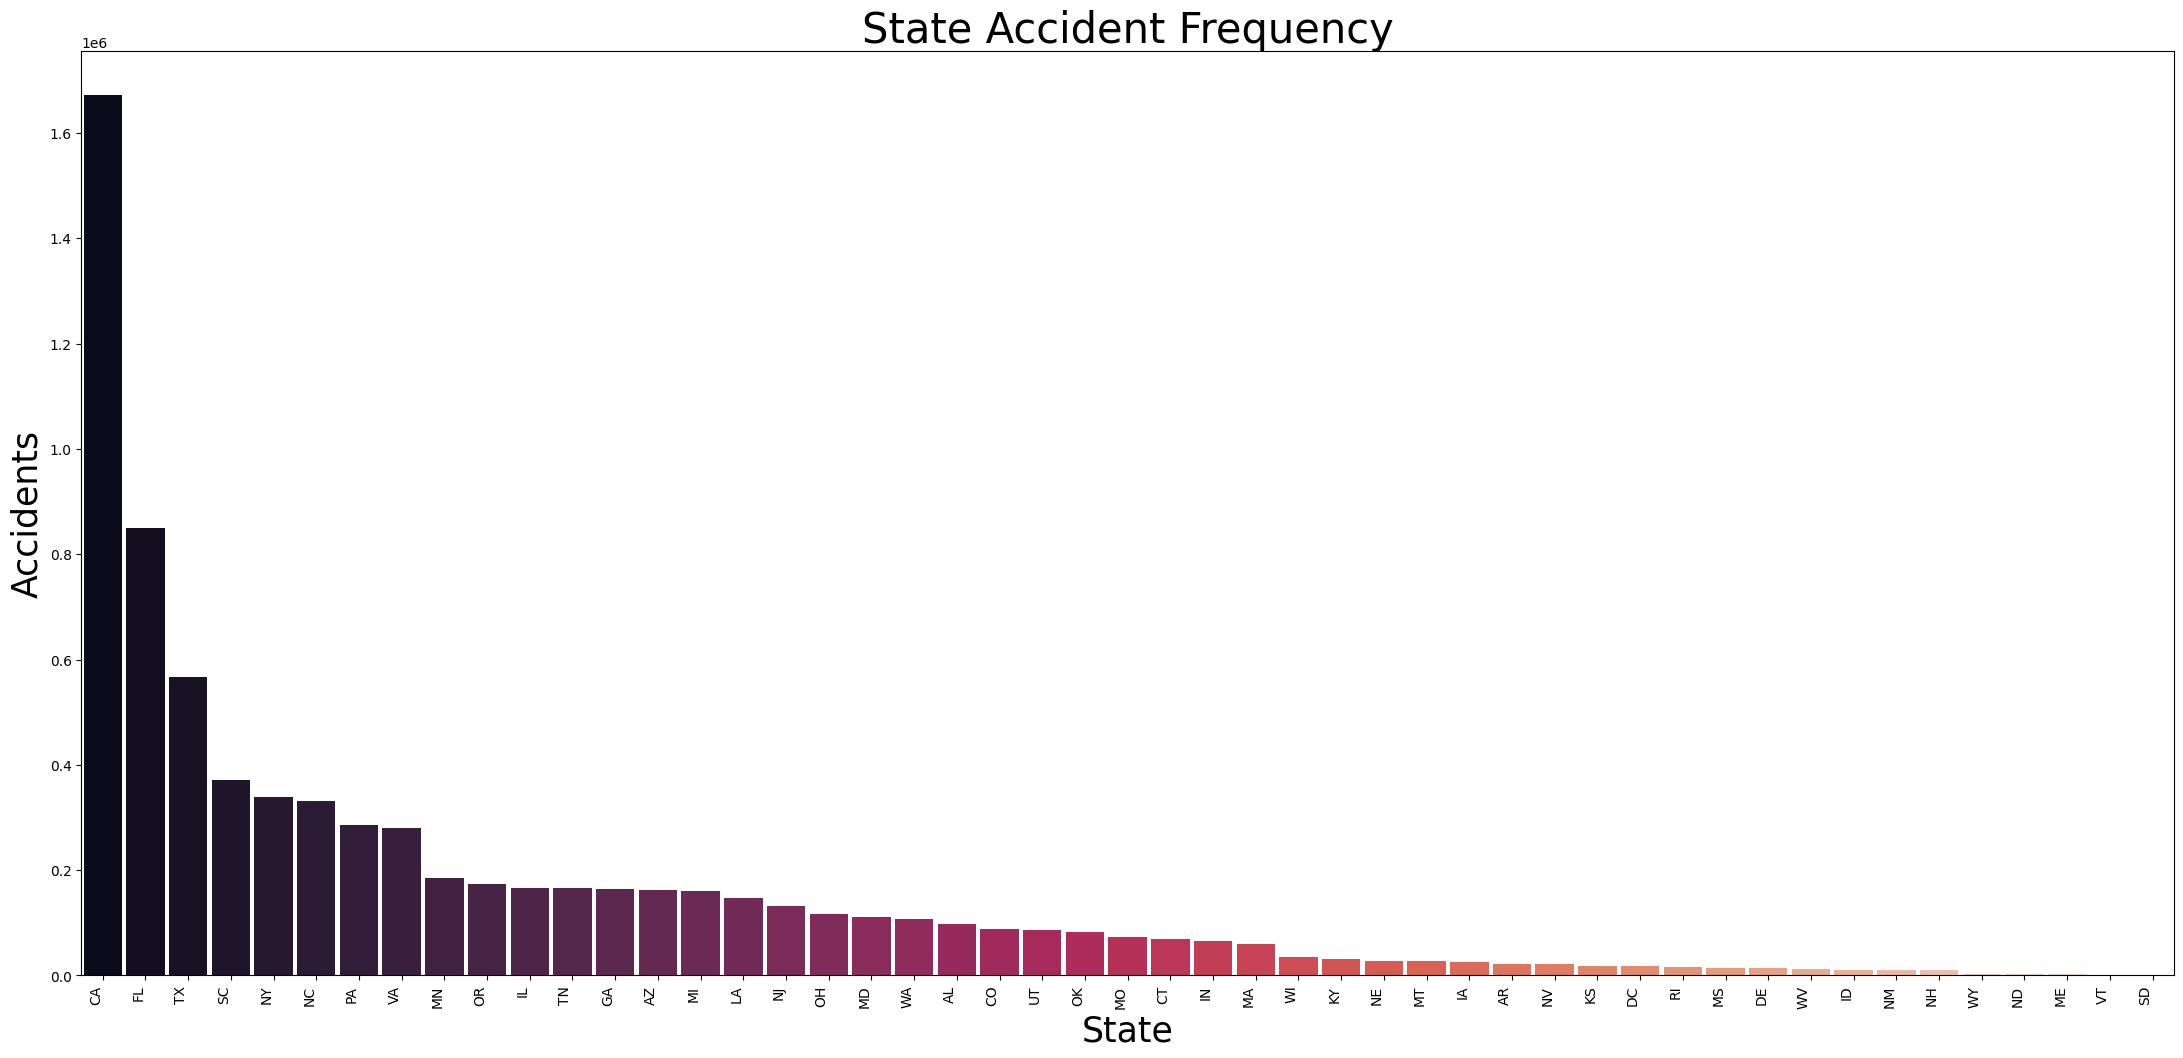

In [35]:
plt.subplots(figsize = (27,12))
cp= sns.countplot(new_df_2, x='State',width=0.9 , order=new_df_2['State'].value_counts().index, palette='rocket');
cp.set_title('State Accident Frequency', fontsize=30)
cp.set_xlabel("State", fontsize=25)
cp.set_ylabel("Accidents", fontsize=25)
plt.xticks(rotation=90, ha='right');

Observations:
1) California(CA) has the highest number of accidents
2) Alaska(AK) has 2nd spot in terms of number of accidents and Texas(TX) has 3rd

### City

In [36]:
print("Unique Cities:", new_df_2['City'].unique())
print("No. of Unique Cities:", len(new_df_2['City'].unique()))

Unique Cities: ['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Ness City' 'Clarksdale'
 'American Fork-Pleasant Grove']
No. of Unique Cities: 12237


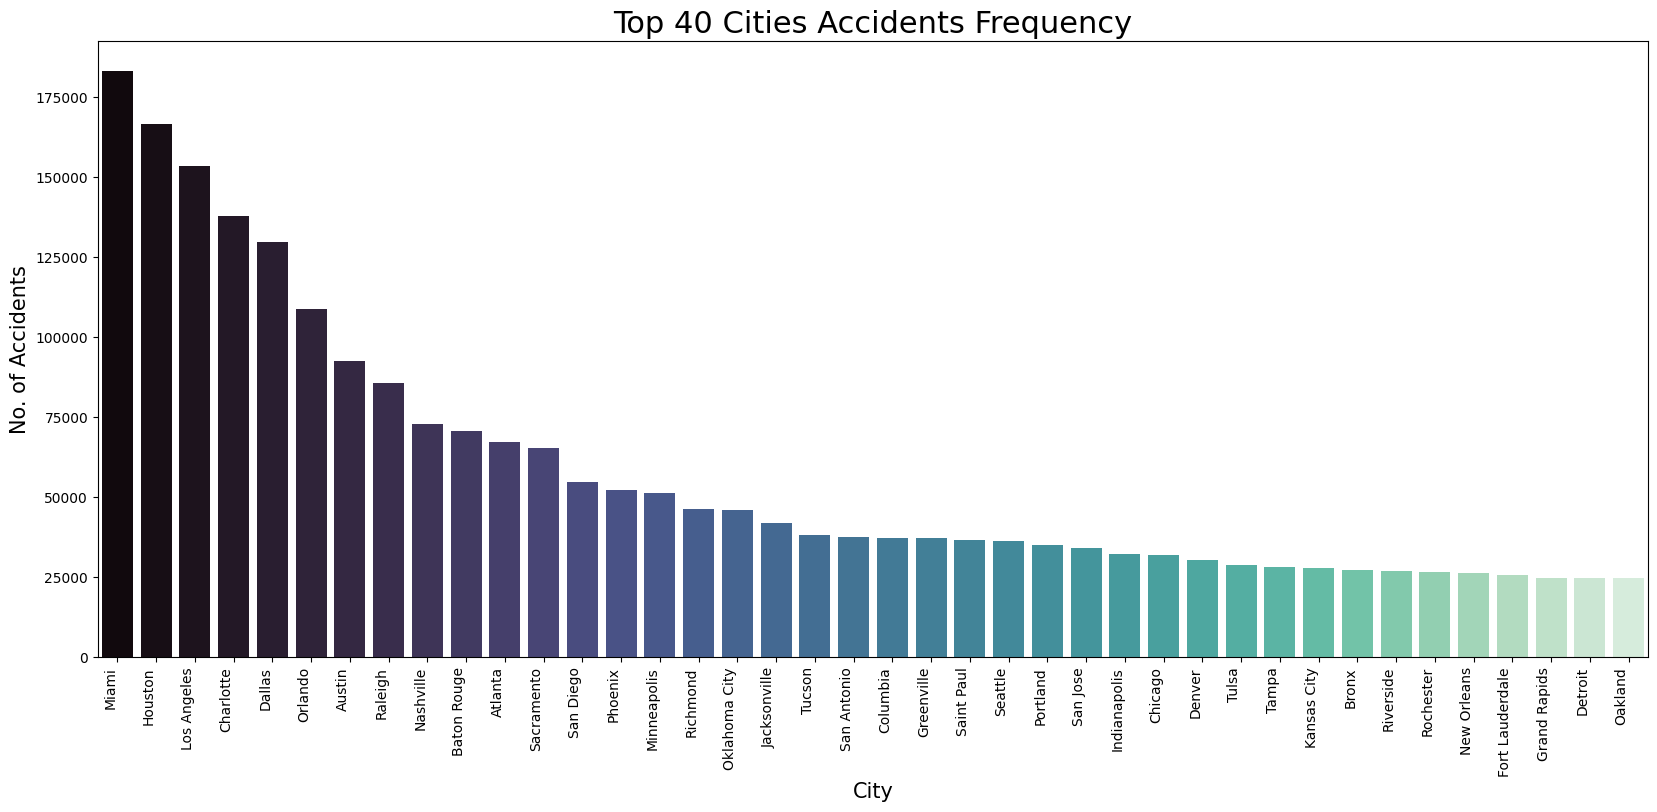

In [37]:
plt.subplots(figsize=(20,8))
cc= sns.countplot(new_df_2, x='City', order=new_df_2['City'].value_counts().iloc[:40].index , palette='mako')
cc.set_ylabel('No. of Accidents', fontsize=15)
cc.set_xlabel('City', fontsize=15)
cc.set_title('Top 40 Cities Accidents Frequency', fontsize=22)
plt.xticks(rotation=90, ha='right');

### Factors associated with accidents

In [38]:
new_df_2.head(2)

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour,Weekday
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,5,0
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,6,0


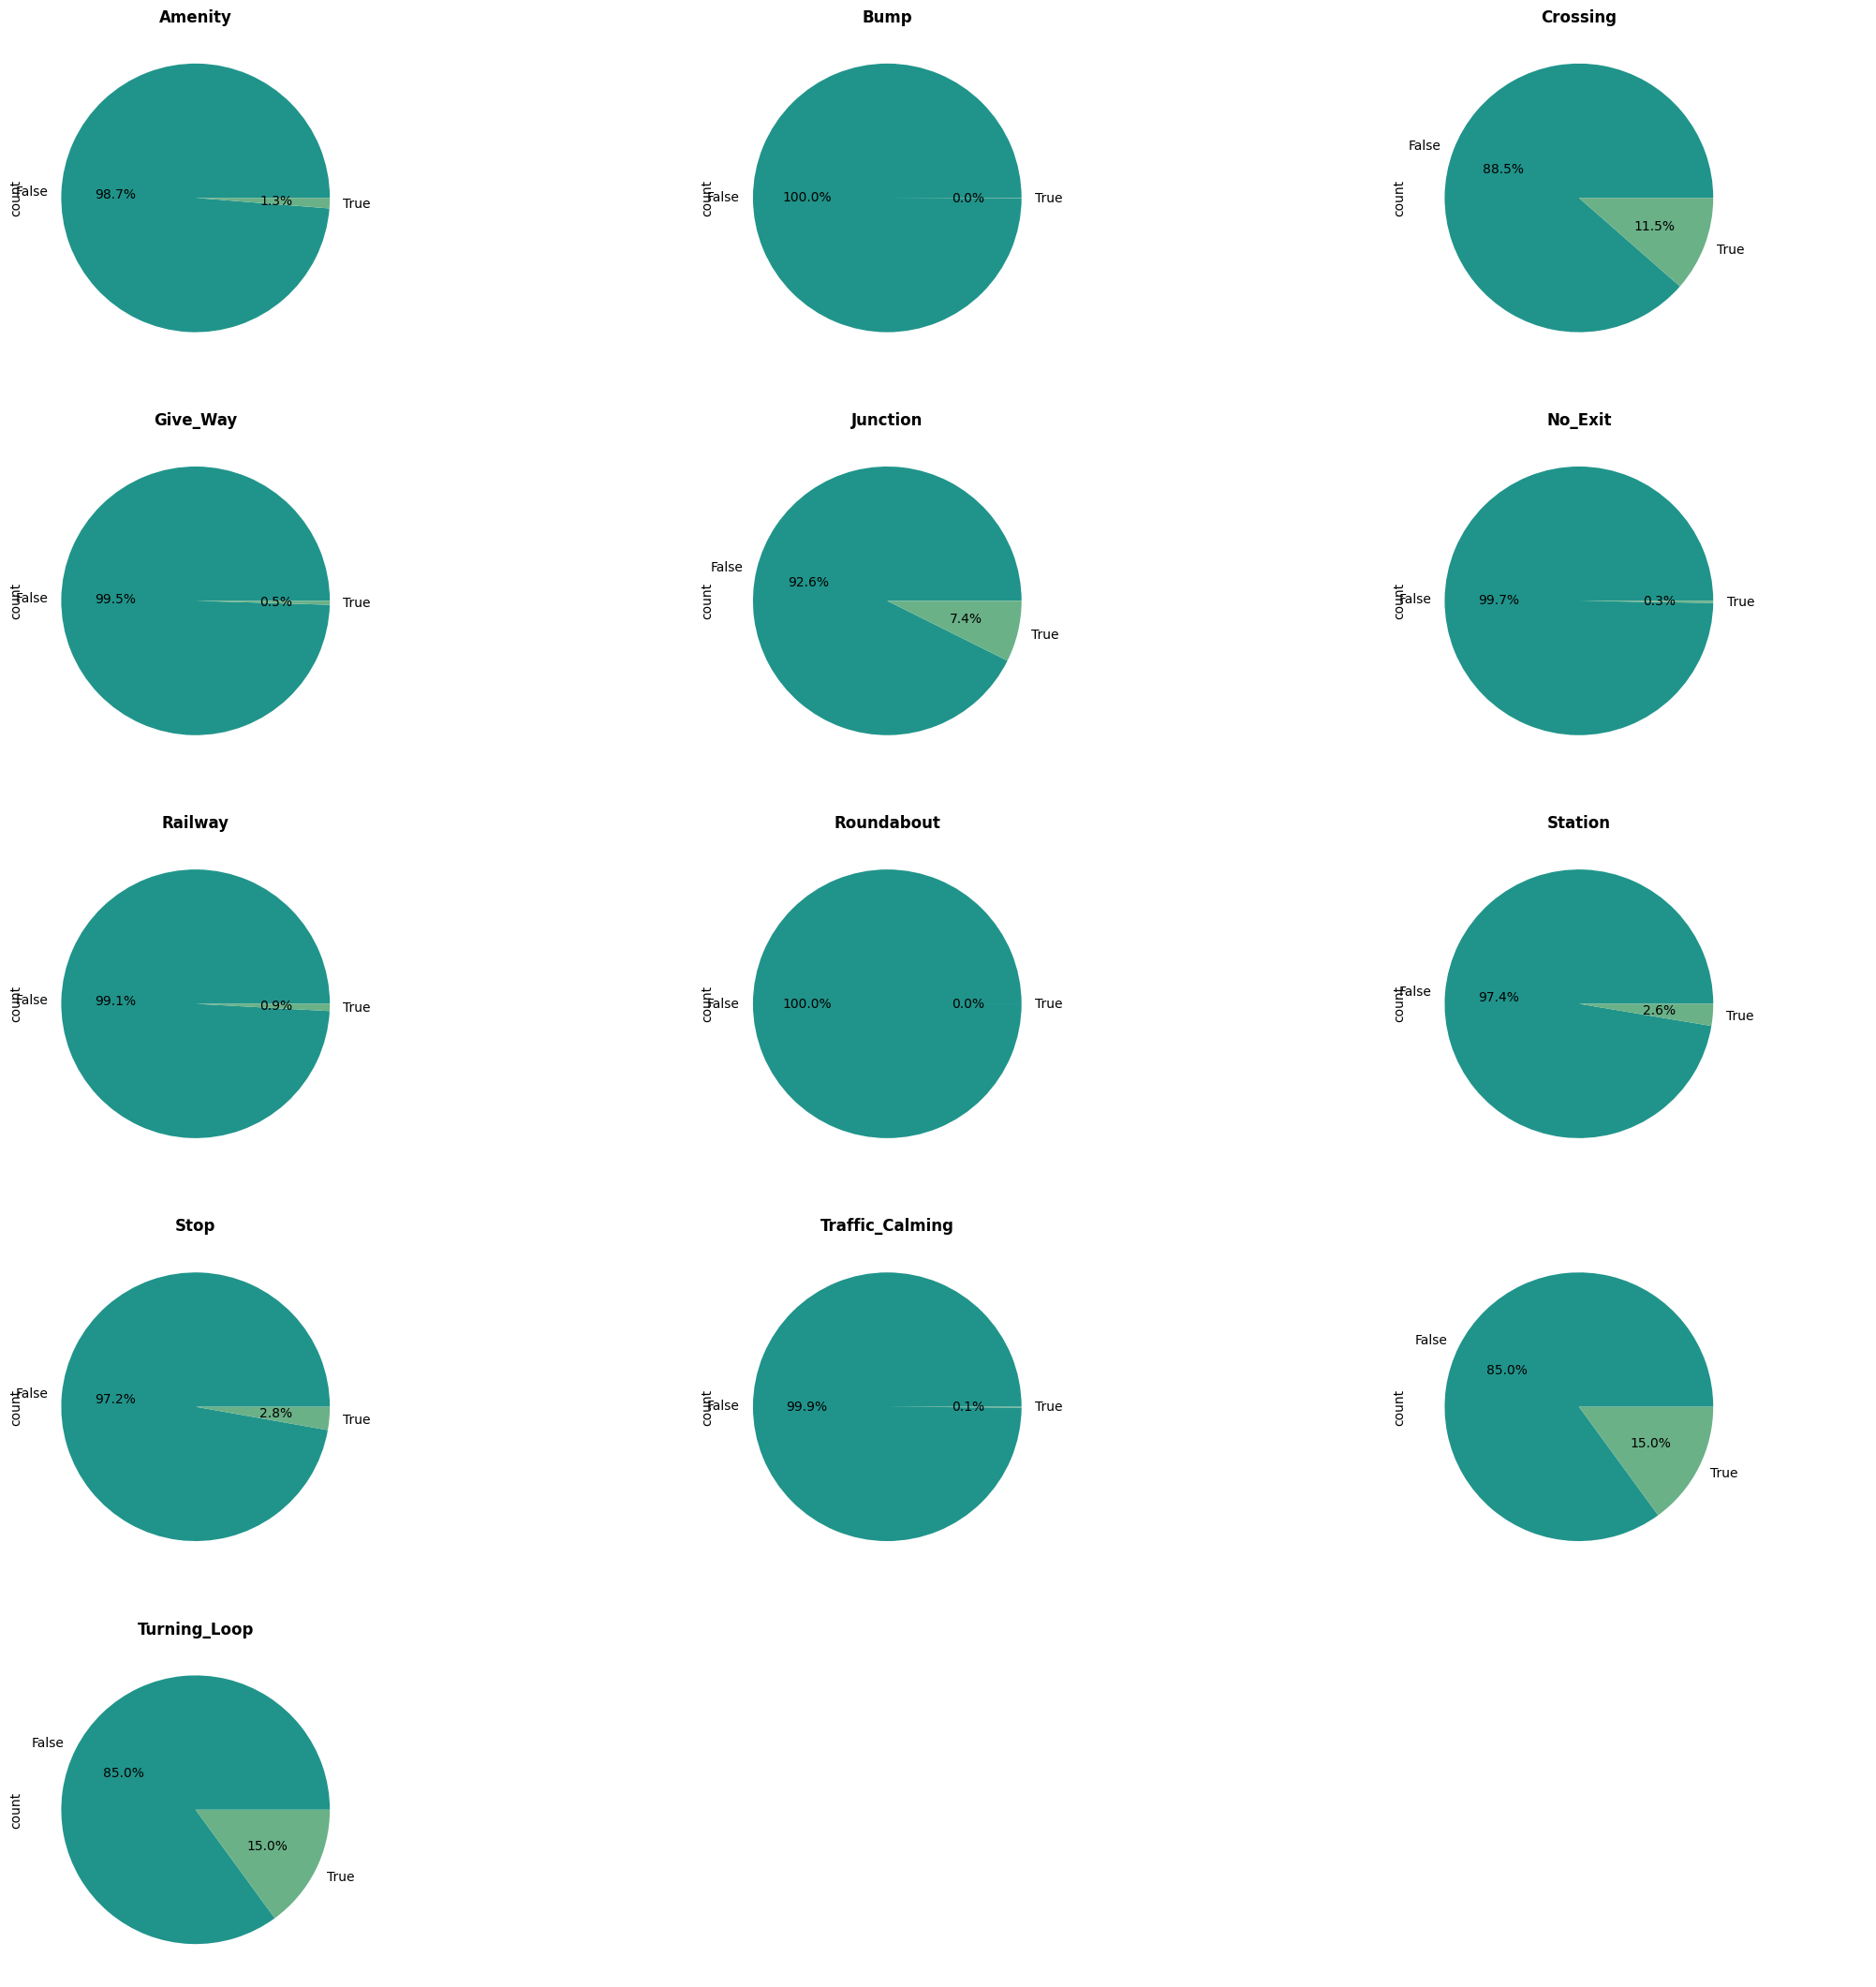

In [39]:
f,ax=plt.subplots(5,3,figsize=(27,27))
ax[0,0] = new_df_2['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=['#20948B','#6AB187'])
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = new_df_2['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["#20948B","#6AB187"])
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = new_df_2['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["#20948B","#6AB187"])
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = new_df_2['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["#20948B","#6AB187"])
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = new_df_2['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["#20948B","#6AB187"])
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = new_df_2['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["#20948B","#6AB187"])
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = new_df_2['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["#20948B","#6AB187"])
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = new_df_2['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["#20948B","#6AB187"])
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = new_df_2['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["#20948B","#6AB187"])
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = new_df_2['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["#20948B","#6AB187"])
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = new_df_2['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["#20948B","#6AB187"])
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = new_df_2['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["#20948B","#6AB187"])
ax[4,0] = new_df_2['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[4,0],colors=["#20948B","#6AB187"])
ax[4,0].set_title("Turning_Loop",fontweight ="bold")

ax[4,1].axis('off')
ax[4,2].axis('off')

plt.show()